In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table in hawaii.sqlite
MS = Base.classes.measurement
ST = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
# View database
session.query(MS, ST).all()

[(<sqlalchemy.ext.automap.measurement at 0x1c29b193d60>,
  <sqlalchemy.ext.automap.station at 0x1c2a218e820>),
 (<sqlalchemy.ext.automap.measurement at 0x1c29b193d60>,
  <sqlalchemy.ext.automap.station at 0x1c2a218e8b0>),
 (<sqlalchemy.ext.automap.measurement at 0x1c29b193d60>,
  <sqlalchemy.ext.automap.station at 0x1c2a218e910>),
 (<sqlalchemy.ext.automap.measurement at 0x1c29b193d60>,
  <sqlalchemy.ext.automap.station at 0x1c2a218e970>),
 (<sqlalchemy.ext.automap.measurement at 0x1c29b193d60>,
  <sqlalchemy.ext.automap.station at 0x1c2a218e9d0>),
 (<sqlalchemy.ext.automap.measurement at 0x1c29b193d60>,
  <sqlalchemy.ext.automap.station at 0x1c2a218ea30>),
 (<sqlalchemy.ext.automap.measurement at 0x1c29b193d60>,
  <sqlalchemy.ext.automap.station at 0x1c2a218ea90>),
 (<sqlalchemy.ext.automap.measurement at 0x1c29b193d60>,
  <sqlalchemy.ext.automap.station at 0x1c2a218eaf0>),
 (<sqlalchemy.ext.automap.measurement at 0x1c29b193d60>,
  <sqlalchemy.ext.automap.station at 0x1c2a218eb50>),
 

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# desc is descending and first is the first response
session.query(MS.date).order_by(MS.date.desc()).first()

('2017-08-23')

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
date = dt.date(2017,8,23)- dt.timedelta(days=365)
print("date :", date)

# Perform a query to retrieve the data and precipitation scores
annual_rain = session.query(MS.date, MS.prcp).filter(MS.date >= date).all()
annual_rain

# Save the query results as a Pandas DataFrame and set the index to the date column
rain = pd.DataFrame(annual_rain, columns=['Date', 'Prcp'])
rain.set_index('Date', inplace=True)

# Sort the dataframe by date
rain.sort_index()

date : 2016-08-23


,Prcp
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


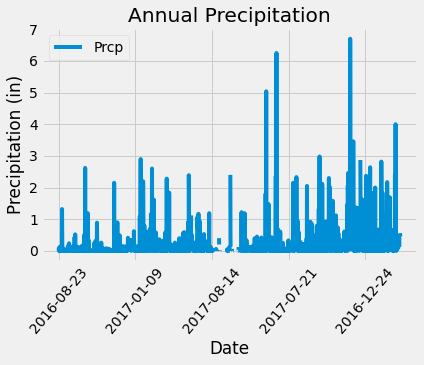

In [28]:
# Use Pandas Plotting with Matplotlib to plot the data
rain.plot(rot = 50, title='Annual Precipitation')
plt.ylabel('Precipitation (in)')
plt.tight_layout
plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(ST.station).group_by(ST.id).count()
station_count

9

In [34]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(MS.station, func.count(MS.station)).group_by(MS.station).\
    order_by(func.count(MS.station).desc()).all()



In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [18]:
# Close Session
#session.close()